## Dataset Overview

The file Bank.xls contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer's relationship with the bank (mortgage, securities
account, etc.), and the customer response to the last personal loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to
them in the earlier campaign.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Dataset Context

This case is about a bank (Thera Bank) whose management wants to explore ways of
converting its liability customers to personal loan customers (while retaining them as
depositors). A campaign that the bank ran last year for liability customers showed a healthy
conversion rate of over 9% success. This has encouraged the retail marketing department to
devise campaigns with better target marketing to increase the success ratio with minimal budget

In [3]:
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Description of Attributes

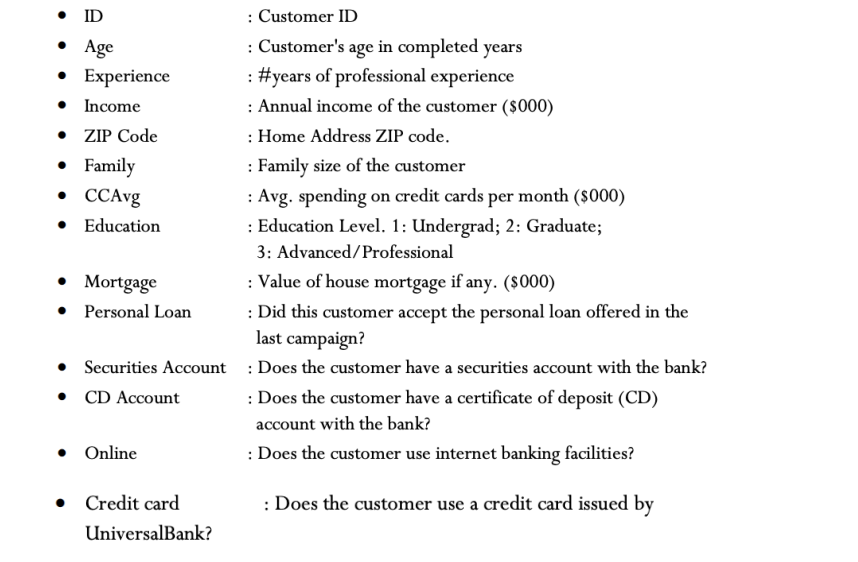

### Check Missing Values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [10]:
data.shape

(5000, 14)

### Data Preprocessing

In [8]:
data["ZIP Code"].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
9307       1
94598      1
Name: ZIP Code, Length: 467, dtype: int64

In [9]:
preprocessed_data = data.drop(["ID", "ZIP Code"], axis=1)
preprocessed_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [11]:
preprocessed_data.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [15]:
# Explore data whose experience is negative
less_exp_0 = preprocessed_data[preprocessed_data["Experience"] < 0]
less_exp_0.shape

(52, 12)

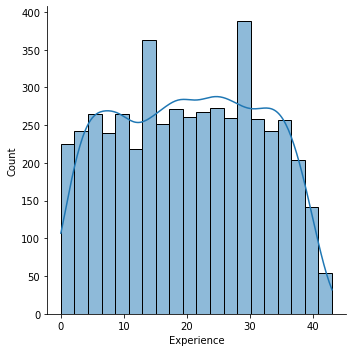

In [20]:
# Distribution of experience feature
more_exp_0 = preprocessed_data[preprocessed_data["Experience"] >= 0]
sns.displot(more_exp_0["Experience"], kde=True)

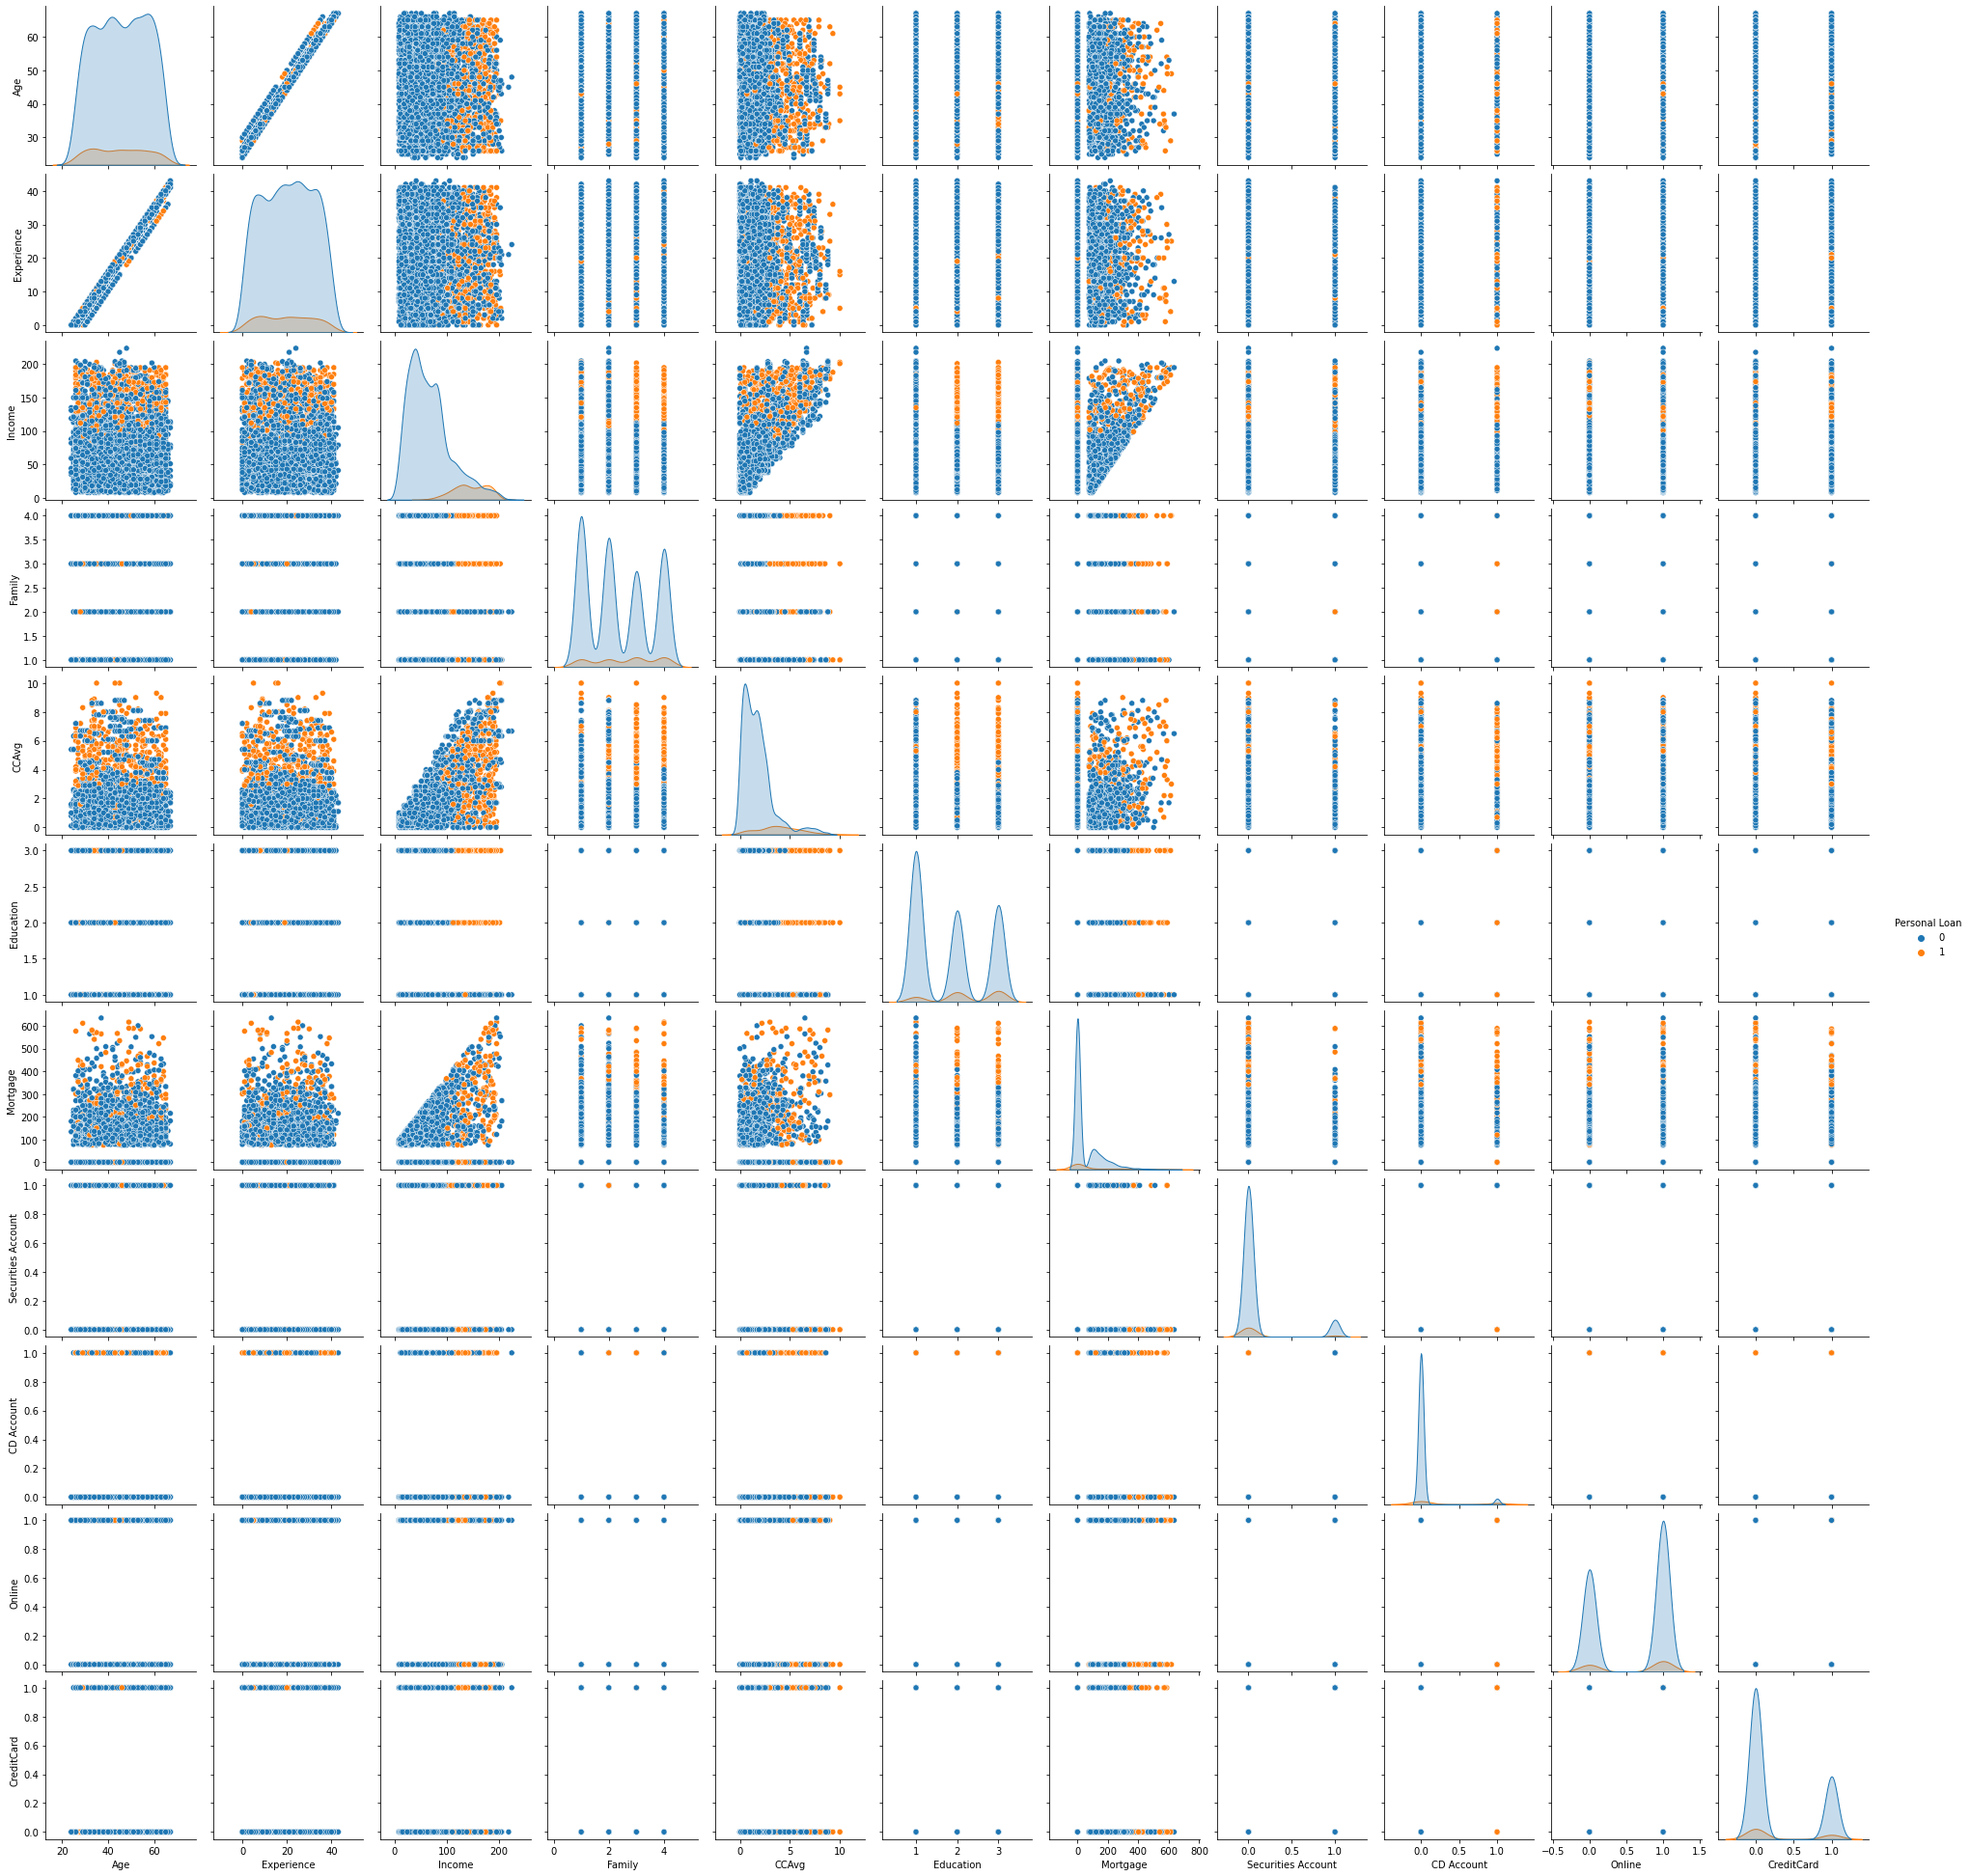

In [24]:
sns.pairplot(more_exp_0, hue="Personal Loan")

Insights:
1. It is clear that **age is highly positive-correlated with experience**. Then, **income is moderately positive-correlated with CCAvg and Mortgage**
2. Most of people buy personal loans have **income more than approximately 100.000, higher education, and less financial options (credit cards, internet banking, etc.)**

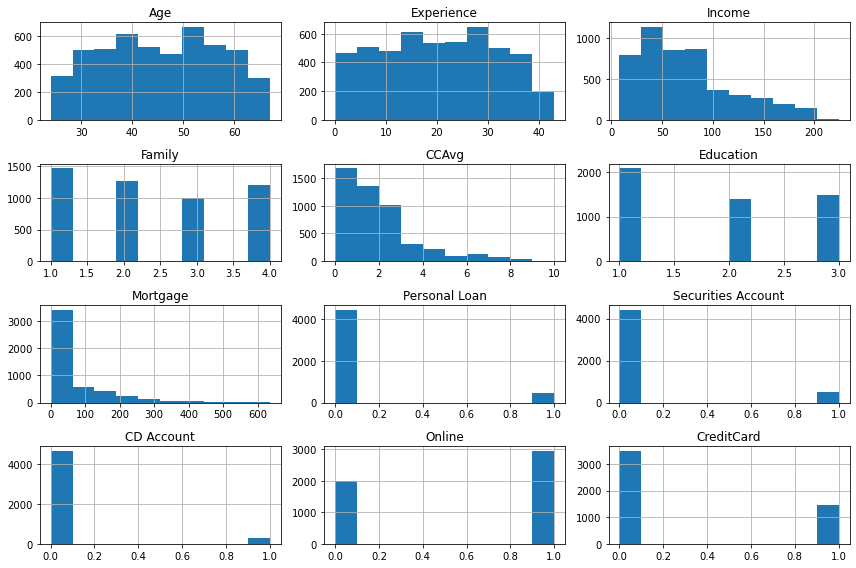

In [34]:
more_exp_0.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

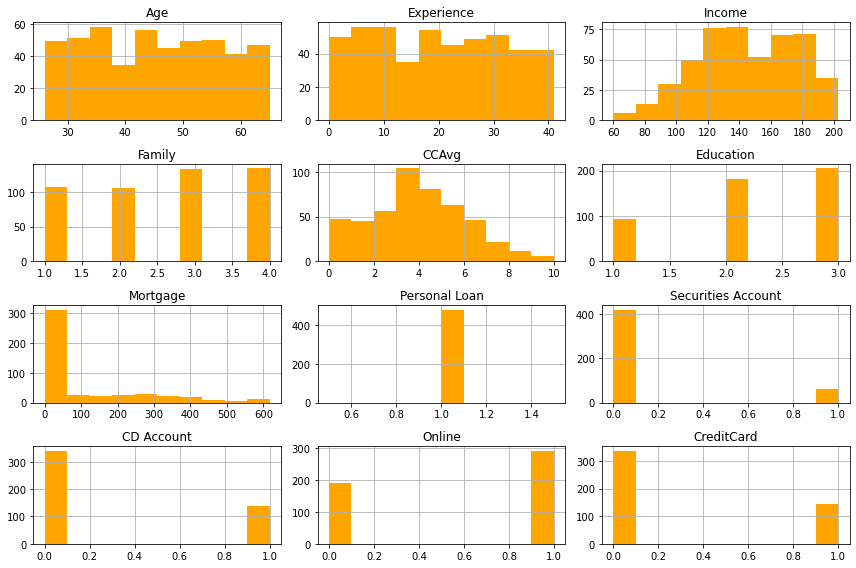

In [38]:
# Distribution of all features whose people accept the personal loan
more_exp_0[more_exp_0["Personal Loan"] == 1].hist(figsize=(12, 8), color="orange")
plt.tight_layout()
plt.show()

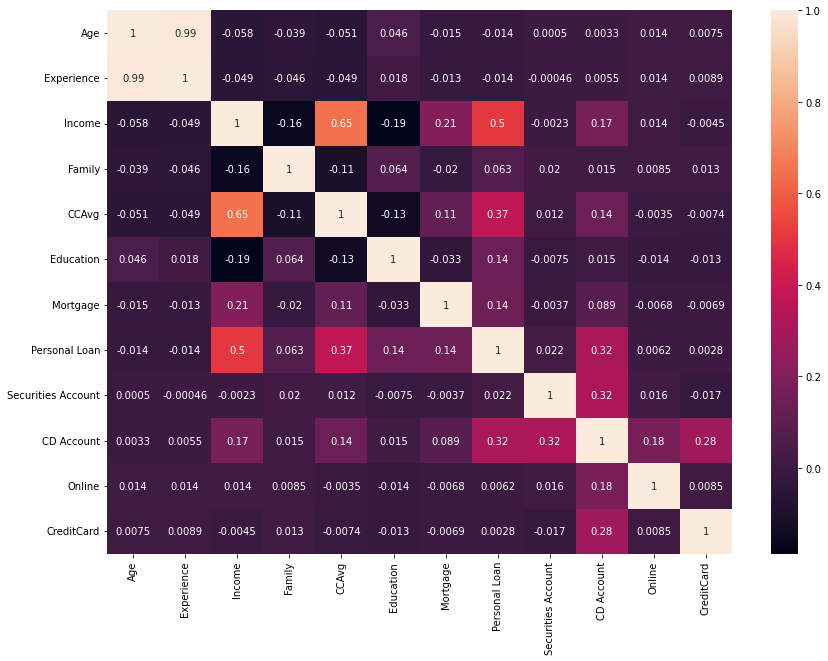

In [42]:
# Correlation of features
plt.figure(figsize=(14, 10))
sns.heatmap(more_exp_0.corr(), annot=True)
plt.show()

### Build a Model

In [43]:
more_exp_0["Personal Loan"].value_counts()

0    4468
1     480
Name: Personal Loan, dtype: int64

In [44]:
more_exp_0.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [67]:
from sklearn.model_selection import train_test_split

# Input and Target
X = more_exp_0.drop(["Personal Loan", "Age"], axis=1)
Y = more_exp_0["Personal Loan"]

# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=42, stratify=Y)

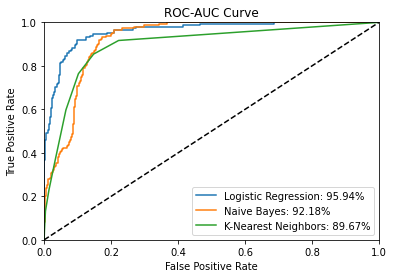

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_fscore_support

lr = LogisticRegression(solver="liblinear")
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=10)

models = [("Logistic Regression", lr), ("Naive Bayes", nb), ("K-Nearest Neighbors", knn)]
for name, model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict_proba(X_test)
    
    # Plotting ROC AUC Curve 
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred[:, 1]) 
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name}: {(auc_score * 100):.2f}%")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()

**Insight**: **Logistic Regression is better than Naive Bayes and KNN (n_neighbors=10)**. Assuming there is no multicolinearity between features by deleting "Age" (caused by "Age" and "Experience" is correlated perfectly)

#### More Exploration on KNN

In [ ]:
k_nums = range(5, 105, 5)
knn_data = {"k": [], "precision": [], "recall": [], "f1-score": []}
for k in k_nums:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, y_pred)
    
    # Append data
    knn_data["k"].append(k)
    knn_data["precision"].append(precision[1])
    knn_data["recall"].append(recall[1])
    knn_data["f1-score"].append(f1_score[1])

In [97]:
knn_summary = pd.DataFrame(data=knn_data)
knn_summary.sort_values("f1-score", ascending=False).reset_index(drop=True).head(10)

,k,precision,recall,f1-score
0,5,0.571429,0.361111,0.442553
1,35,0.542857,0.263889,0.355140
2,15,0.573770,0.243056,0.341463
3,10,0.634615,0.229167,0.336735
4,25,0.507246,0.243056,0.328638
5,20,0.603774,0.222222,0.324873
6,55,0.592593,0.222222,0.323232
7,40,0.566038,0.208333,0.304569
8,45,0.547170,0.201389,0.294416
9,30,0.508772,0.201389,0.288557


In [104]:
y_pred = models[0][1].predict(X_test)
print("Logistic Regression\n\n")
print(classification_report(Y_test, y_pred))

Logistic Regression


              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1341
           1       0.76      0.56      0.64       144

    accuracy                           0.94      1485
   macro avg       0.86      0.77      0.80      1485
weighted avg       0.94      0.94      0.94      1485



KNN is still doing no better than Logistic Regression. Then, we will **make use of Logistic Regression** only

#### Resampling Dataset

In [105]:
concat_data = pd.concat([X_train, Y_train], axis=1)
concat_data.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
4696,35,70,4,2.30,3,0,0,0,0,0,0
3431,38,63,2,1.70,3,184,1,0,1,0,0
4150,20,72,2,1.70,2,75,0,0,1,0,0
2531,35,14,2,1.00,1,107,0,0,1,0,0
1704,22,198,2,6.67,1,0,0,0,0,1,0


In [106]:
concat_data["Personal Loan"].value_counts()

0    3127
1     336
Name: Personal Loan, dtype: int64

In [109]:
from sklearn.utils import resample

concat_data_1 = concat_data[concat_data["Personal Loan"] == 1]
upsampled_data = resample(concat_data_1, n_samples=(3127-336), random_state=0)
train_data = pd.concat([concat_data, upsampled_data]).sample(frac=1).reset_index(drop=True)
train_data["Personal Loan"].value_counts()

0    3127
1    3127
Name: Personal Loan, dtype: int64

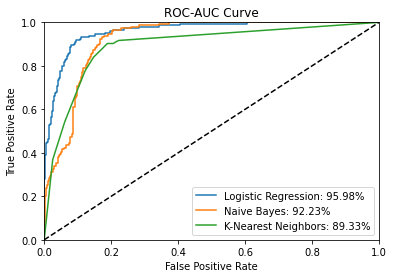

In [114]:
X_train = train_data.drop("Personal Loan", axis=1)
Y_train = train_data["Personal Loan"]

lr = LogisticRegression(solver="liblinear")
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=10)

models = [("Logistic Regression", lr), ("Naive Bayes", nb), ("K-Nearest Neighbors", knn)]
for name, model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict_proba(X_test)
    
    # Plotting ROC AUC Curve 
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred[:, 1]) 
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name}: {(auc_score * 100):.2f}%")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()

In [115]:
y_pred = models[0][1].predict(X_test)
print("Logistic Regression\n\n")
print(classification_report(Y_test, y_pred))

Logistic Regression


              precision    recall  f1-score   support

           0       0.99      0.90      0.95      1341
           1       0.51      0.91      0.65       144

    accuracy                           0.91      1485
   macro avg       0.75      0.91      0.80      1485
weighted avg       0.94      0.91      0.92      1485



With or without resampling method, logistic regression is still doing good. Also, performance of logistic regression using with or without resampling is almost similar. **So, we will choose logistic regression without resampling** since its precision is far higher than with resampling.

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=42, stratify=Y)

lr = LogisticRegression(solver="liblinear")
lr.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

#### Choosing the Best Threshold

In [123]:
# Return all FPR, TPR, and Threshold
y_pred = lr.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred[:, 1]) 

In [124]:
lr_summary = pd.DataFrame(data=
                         {"Threshold": thresholds,
                          "False Positive Rate": fpr,
                          "True Positive Rate": tpr
                         })
lr_summary.head()

,Threshold,False Positive Rate,True Positive Rate
0,1.996139,0.000000,0.000000
1,0.996139,0.000000,0.006944
2,0.921417,0.000000,0.201389
3,0.914900,0.000746,0.201389
4,0.763263,0.000746,0.368056


In [137]:
# The best threshold among this sub-dataset
lr_summary[(lr_summary["False Positive Rate"] < 0.2) & (lr_summary["True Positive Rate"] > 0.85)]

,Threshold,False Positive Rate,True Positive Rate
72,0.169631,0.068606,0.861111
73,0.154091,0.075317,0.861111
74,0.152193,0.075317,0.868056
75,0.144327,0.079045,0.868056
76,0.143157,0.079045,0.875000
77,0.137646,0.083520,0.875000
78,0.137477,0.083520,0.881944
79,0.128349,0.093214,0.881944
80,0.126982,0.093214,0.895833
81,0.125667,0.094705,0.895833


In [195]:
y_pred = lr.predict_proba(X_test)[:, 1] >= 0.4
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1341
           1       0.73      0.65      0.69       144

    accuracy                           0.94      1485
   macro avg       0.85      0.81      0.83      1485
weighted avg       0.94      0.94      0.94      1485



By doing trial and error, we choose **the logistic regression's threshold is 0.4**. Since precision and recall are averagely good enough. Supported by f1-score, which indicates good model without decreasing f1-score in label "0".

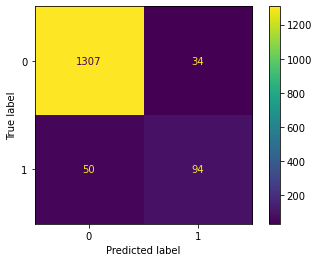

In [196]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(Y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

## Conclusion

In this case, logistic regression is the best classification model, other than KNN and Naive Bayes. These are the reasons:
1. Normality of errors with zero mean and homoscedacity: with help of constant value of bias, the problem is solved. Also, we assume, there is almost no variance in output value based on inputs.
2. No Autocorrelation: this is cross-section data, so we assume there is unlikely autocorrelation of errors.
3. Multicolinearity: deleting "age" column, since it is highly-correlated with "experience" column.
4. No Endogeneity: based on classification report, our logistic regression's performance is great. We assume there is no omitted variable.